<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/%EC%88%98%EC%97%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_3_%EB%B6%84%EC%84%9D%EA%B2%B0%EA%B3%BC%EC%8B%9C%EA%B0%81%ED%99%94(%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

#pandas profiling
!pip install -U pandas-profiling

Selecting previously unselected package fonts-nanum.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Looking in indexes: https://pypi.org/simple, https://us-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

NanumGothic Eco


In [4]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 6.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px  # 시각화 라이브러리

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [6]:
# import requests # 웹 상의 데이터를 가져올 때
# from bs4 import BeautifulSoup # 가져온 데이터에서 필요한 정보를 골라낼(파싱할) 때
# from urllib.request import urlopen
from tqdm.notebook import tqdm
import re 

- c: category
- only: 1은 진행중, 2는 만료
- page: 페이지 번호
- order : 1은 최신순, 2는 추천순

# EDA

In [9]:
df_petition = pd.read_csv('/content/drive/MyDrive/국민청원데이터.csv')
df_petition

,number,progress,title,votes,category,start,end
0,595749,청원진행중,기관과 외국인의 이익을 대변하는 금융위원회를 해체하라!,"3,624",경제민주화,2021-01-18,2021-02-17
1,595561,청원진행중,9번째 국민청원 도와주세요! ‘딸이 강간당하는 것을 목격’ 대통령이 30만 동의 에...,"42,435",인권/성평등,2021-01-12,2021-02-11
2,595706,청원진행중,"알페스에 대한 허위사실 유포 및, 준법 알페서들을 해킹 사이버스토킹 계좌사기 개인정...","4,177",인권/성평등,2021-01-15,2021-02-14
3,595588,청원진행중,한국사능력검정시험 서버증설 및 상시 시험 변경 요구,"1,755",행정,2021-01-12,2021-02-11
4,595610,청원진행중,울산 성민이사건 살인범 잡아주세요.,"6,499",육아/교육,2021-01-13,2021-02-12
...,...,...,...,...,...,...,...
849,595555,청원진행중,이래도 공매도를 옹호 하렵니까. 공매도 영구 폐지는 경제민주화의 초석입니다.,"35,066",경제민주화,2021-01-11,2021-02-10
850,596175,청원진행중,정부는 집값을 잡기 위해 주택공매도 제도를 도입하기 바랍니다,"2,222",경제민주화,2021-02-01,2021-03-03
851,595576,청원진행중,트위터에서 역사적 위인을 대상으로 알페스물로 모독한 사람들의 신상 공개와 처벌을 원...,623,인권/성평등,2021-01-12,2021-02-11
852,595884,청원진행중,펜션에서난 사고로 영구장해를 입은 저희 아버님이 보험사 때문에 펜션으로부터 소송을 ...,552,기타,2021-01-21,2021-02-20


In [10]:
df_petition.info()  

# 보통 GB정도떠야 메모리를 많이 차지하고있는것, kb정도라면 무시해도됌
# 1GB 근처면 ram이 버거워할 수 있다
# ram 13기가정도 사용 가능/ 1GB를 연산하는데에는 훨씬많은 메모리 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    854 non-null    int64 
 1   progress  854 non-null    object
 2   title     854 non-null    object
 3   votes     854 non-null    object
 4   category  854 non-null    object
 5   start     854 non-null    object
 6   end       854 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.8+ KB


데이터의 각 항목은
- number: 청원의 ID, url에 표현된 청원 순번
- progress: 청원 상태, 청원 시작, 청원진행중, 청원종료, 답변완료 4가지 카테고리로 구성
- title: 청원 제목
- votes: 청원 참여인원
- category: 청원 카테고리
- start: 청원 시작 날짜
- end: 청원 종료날짜

를 나타냅니다.

다만, votes는 숫자이지만 object형이고, start, end도 날짜형으로의 변환이 필요해보입니다.   

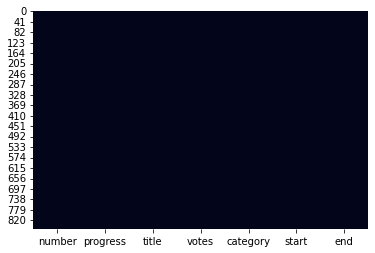

In [11]:
# 결측치 확인
sns.heatmap(df_petition.isnull(), cbar=False)\
# 반대 notnull()

info의 결과와 결측치 시각화를 살펴보면 결측치는 없는 것으로 보입니다.   
이제 데이터를 하나하나 살펴봅시다

#### number

전체 854개의 청원 ID가 있음을 확인할 수 있습니다.   
결측치도 없고 int형으로 알맞은 데이터타입 입니다. 

In [12]:
len(df_petition['number'].unique())
# unique 중복 제거, 데이터 목록 보여줌 854
# 성별 확인할떄도 사용 / 2개 나와야할때

854

#### progress

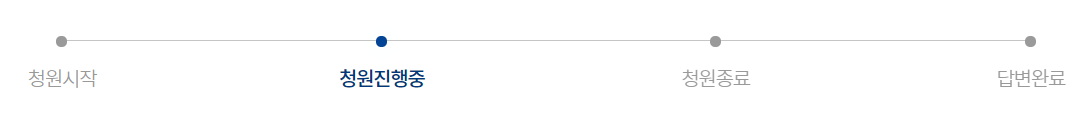

청원의 상태는 4가지로 분류됩니다. 현재 데이터는 "청원진행중"인 청원만 크롤링하였습니다.      


In [13]:
df_petition['progress'].describe()
# describe() 기초 통계치 계산
# top : 비율이 제일 높은 클래스
# freq : top 클래스의 개수

count       854
unique        1
top       청원진행중
freq        854
Name: progress, dtype: object

#### votes


votes는 object에서 int형으로 변환이 필요합니다.   
쉼표를 제거하고 형변환을 해봅시다


In [17]:
# votes가 현재 문자열인데 int로 바꾸고 싶지만 쉼표가 들어가있어서 불가능 하다. replace로 변환
df_petition['votes'] = df_petition.votes.str.replace(',', '') # 쉼표제거
# votes 컬럼에 모든 값에 replace() 적용
# df_petition.votes로 해도 됨
# df_petition.votes.replace(',', '') -> 으로 하면 votes의 값 자체가 ',' 인 경우에 null 값으로 바뀜
# string method를 사용하려고한다면, str을 붙여주어야 함!!!
df_petition.votes
# 형변환
df_petition['votes'] = df_petition.votes.astype(int)
df_petition.votes

0       3624
1      42435
2       4177
3       1755
4       6499
       ...  
849    35066
850     2222
851      623
852      552
853      129
Name: votes, Length: 854, dtype: int64

In [18]:
# df_petition['votes'] = df_petition.votes.str.replace(',', '')  # 
# df_petition['votes'] = df_petition['votes'].map({'생존': 1, '사망' : 0})
# df_petition['votes']

In [ ]:
df_petition['votes'].describe()
# 분위수 : 데이터를 등급화 하는것 (기술 통계치) - Quantile
# 현재 평균과 중위수 값이 많이 차이남 -> 치우침의 정도(왜도)를 분석할 수 있어야 함 ->  max값이 한참 높음

count       854.000000
mean       4159.176815
std       19451.273475
min         108.000000
25%         318.000000
50%         708.500000
75%        1995.750000
max      388844.000000
Name: votes, dtype: float64

중간값과 평균값 차이가 많이 납니다.
사분위수와 max값을 확인해보면, 일부 값이 많이 커서 전체적인 평균을 올린 것을 확인할 수 있습니다. 


히스토그램과 box plot으로 확인해봅시다. 

In [19]:
df_petition['votes'].iplot(kind='hist') # 히스토그램 - 빈도수 체크

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1, subplot_titles=("전체", "중위값 미만", "중위값 이상", "상위 10%")) 
# 전체 background안에 4개의 plot을 그린다.  

fig.add_trace(go.Histogram(x=df_petition['votes']), row=1, col=1)

# 중위값 미만 
fig.add_trace(
  go.Histogram(x=df_petition['votes'][df_petition['votes'] < df_petition['votes'].median()]),
row=2, col=1)

# 중위값 이상
fig.add_trace(
  go.Histogram(x=df_petition['votes'][df_petition['votes'] >= df_petition['votes'].median()]),
row=3, col=1)

# 상위 10%
fig.add_trace(
  go.Histogram(x=df_petition['votes'][df_petition['votes'] >= df_petition['votes'].quantile(0.9)]),
row=4, col=1)

fig.update_layout(height=1200, width=800)
fig.show()

In [21]:
df_petition['votes'].iplot(kind='box')
# 4분위 값에 대해 시각화 위에서부터 3분위~ 1분위 범위를 box로 그려줌 , 예시가 좋지못함
# 분포가 중심으로부터 얼마나 흩어져 있는가? 파악
# 1,3분위의 1,5배?

In [ ]:
# 가장 참여인원이 많은 청원
df_petition.sort_values(["votes"], ascending=[False]).head(5)
# 정렬 - sort_values함수
# 테이블의 속성 - columns, index, values를 가지고 있음
# sort_values(['정렬값'], ascending=[오름차순, 내림차순 False] ) 우선순위 정렬도 가능

,number,progress,title,votes,category,start,end
116,595595,청원진행중,여성 연예인들을 고통받게 하는 불법 영상 '딥페이크' 를 강력히 처벌해주세요.,388844,인권/성평등,2021-01-13,2021-02-12
259,595630,청원진행중,남초 커뮤니티 음지에서 벌어지는 '제 2의 소라넷' 성범죄를 고발합니다.,233411,인권/성평등,2021-01-13,2021-02-12
699,595551,청원진행중,미성년 남자 아이돌을 성적 노리개로 삼는 '알페스' 이용자들을 강력히 처벌해주세요.,219748,문화/예술/체육/언론,2021-01-11,2021-02-10
443,595653,청원진행중,독립운동가를 능멸한 만화가를 처벌해 주세요.,149674,인권/성평등,2021-01-14,2021-02-13
756,596118,청원진행중,여운국 공수처 차장 임명반대 청원글,89531,정치개혁,2021-01-29,2021-02-28


In [ ]:
# 가장 참여인원이 적은 청원
df_petition.sort_values(["votes"], ascending=[False]).tail(5)

,number,progress,title,votes,category,start,end
502,596259,청원진행중,*** **의 마케팅 영업에 시정을 요구합니다.,117,보건복지,2021-02-05,2021-03-07
661,596297,청원진행중,"*******의 불공정거래 사기범죄 진상규명과 강력한 행정조치, 법적처벌 강화 및 ...",117,안전/환경,2021-02-08,2021-03-10
177,596294,청원진행중,왜 이문4구역만 차별합니까?,116,교통/건축/국토,2021-02-08,2021-03-10
407,596255,청원진행중,"""가야고분군"" 세계유산 등재신청에서 남원 유곡리와 두락리고분군은 제외하여 주십시요",110,문화/예술/체육/언론,2021-02-05,2021-03-07
504,596293,청원진행중,호소문,108,기타,2021-02-08,2021-03-10


#### category

홈페이지에 나와있는 카테고리는 '전체'를 제외하면 17개입니다. 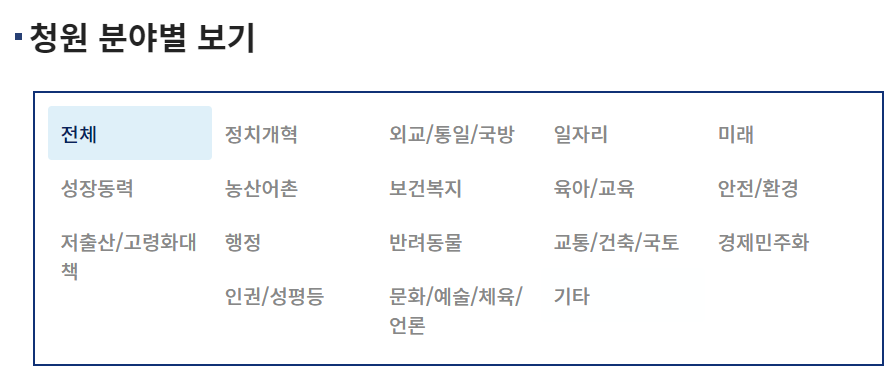

데이터에도 17개의 카테고리가 있습니다. 

In [25]:
df_petition['category'].describe(include='O')
# include='O' -> Object형인것만 describe 하고싶으면 
# 디폴트는 숫자형, 둘다 표현 - all

count     854
unique     17
top        기타
freq      106
Name: category, dtype: object

각 카테고리별 청원 개수입니다.

기타 항목의 청원이 가장 많고, 육아|교육, 보건복지 청원이 그 다음입니다.   
저출산|고령화 카테고리의 청원이 가장 적습니다. 

In [26]:
df_petition['category'].value_counts()
# value를 count 하겠다. 

기타             106
육아/교육           89
보건복지            88
인권/성평등          86
행정              79
교통/건축/국토        79
정치개혁            74
경제민주화           56
안전/환경           43
문화/예술/체육/언론     40
일자              33
반려동물            23
외교/통일/국방        17
농산어촌            12
미래              12
성장동력            10
저출산/고령화대책        7
Name: category, dtype: int64

이때 '일자리' 카테고리 이름에서 '리'가 빠져있습니다.

In [27]:
# 일자 -> 일자리. 
df_petition['category'] = df_petition['category'].map(lambda x: x.replace('일자', '일자리')) 
df_petition['category'].unique()

array(['경제민주화', '인권/성평등', '행정', '육아/교육', '문화/예술/체육/언론', '미래', '일자리',
       '보건복지', '외교/통일/국방', '교통/건축/국토', '농산어촌', '안전/환경', '반려동물', '기타',
       '정치개혁', '저출산/고령화대책', '성장동력'], dtype=object)

In [36]:
px.histogram(df_petition, x = 'category', color = 'category')  # 위 방법이 편함. 
# px.histogram(x = df_petition['category'], color = df_petition['category']) # 둘다 가능하나 위 방법으로 익혀둘 것

#### date

시작날짜와 종료날짜의 형태를 datetime으로 바꿔줍니다. 

In [29]:
df_petition['start'] = pd.to_datetime(df_petition.start, format='%Y-%m-%d')
df_petition['end'] = pd.to_datetime(df_petition.end, format='%Y-%m-%d')

형 변환이 완료되었습니다. 

In [30]:
df_petition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   number    854 non-null    int64         
 1   progress  854 non-null    object        
 2   title     854 non-null    object        
 3   votes     854 non-null    int64         
 4   category  854 non-null    object        
 5   start     854 non-null    datetime64[ns]
 6   end       854 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 46.8+ KB


1월 11일부터 2월 8일까지의 청원이 현재 진행중입니다. 1월 18일에 가장 많은 100개의 청원이 신청되었습니다. 

In [31]:
df_petition[['start', 'end']].describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,start,end
count,854,854
unique,21,21
top,2021-01-18 00:00:00,2021-02-17 00:00:00
freq,100,100
first,2021-01-11 00:00:00,2021-02-10 00:00:00
last,2021-02-08 00:00:00,2021-03-10 00:00:00


In [34]:
# 날짜 별 청원개수 
start_count = df_petition.groupby('start')['number'].count() # number는 시리즈 표현
display(start_count)
start_count.iplot(kind='bar', color='red')

start
2021-01-11     68
2021-01-12     36
2021-01-13     40
2021-01-14     40
2021-01-15     33
2021-01-18    100
2021-01-19     30
2021-01-20     31
2021-01-21     29
2021-01-22     26
2021-01-25     76
2021-01-26     29
2021-01-27     20
2021-01-28     25
2021-01-29     52
2021-02-01     58
2021-02-02     30
2021-02-03     22
2021-02-04     12
2021-02-05     39
2021-02-08     58
Name: number, dtype: int64

#### EDA 자동화

데이터 형태, 결측치, 이상치 확인 등 EDA 작업을 한번에, 좀 더 간편히 할 수 있는 방법도 있습니다.   
pandas profiling, sweetviz, pandas gui 등 여러 라이브러리 중 pandas profiling을 활용해봅시다. 

In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas_profiling

In [ ]:
pr=df_petition.profile_report() 
pr.to_file('./pr_report.html') 
pr

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Overview는 데이터의 전체적인 개요를 보여줍니다. 데이터의 크기, 변수의 수, 결측값(missing value) 비율, 데이터의 종류는 어떤 것이 있는지를 볼 수 있습니다.

변수(Variables)는 데이터에 존재하는 모든 특성 변수들에 대한 결측값, 중복을 제외한 유일한 값(unique values)의 개수 등의 통계치를 보여줍니다. 또한 상위 5개의 값에 대해서는 우측에 바 그래프로 시각화한 결과를 제공합니다. 

toggle detail을 누르면 상세한 정보 확인이 가능합니다. 특히나 title변수의 상세사항에는 단어와 문자의 빈도수 확인도 가능합니다.


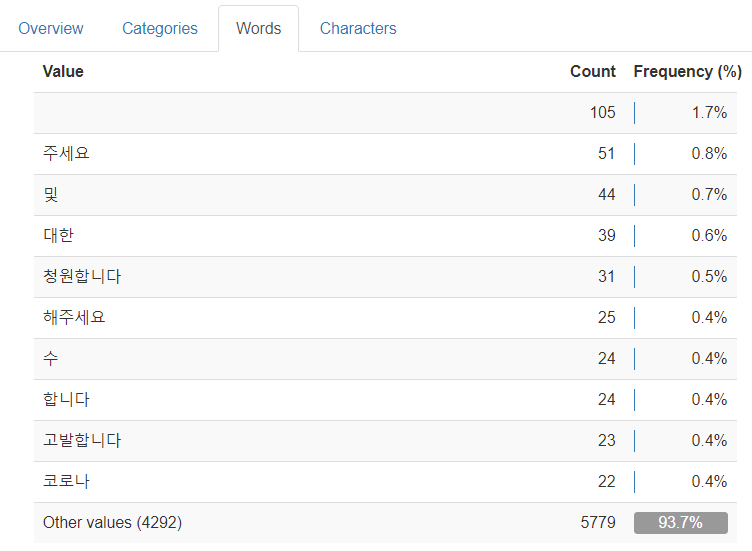

다만 토큰화 등의 전처리가 되어 있지 않아서 동사나 띄어쓰기 같은 값들도 포함되어 있습니다. 

## Title 워드클라우드

청원제목에서 명사를 추출하여 가장 많은 관심을 받은 주제가 무엇인지 알아봅시다!

- 워드클라우드란?    
자연어처리(NLP)시에 doc에서 언급된 단어들의 빈도수를 파악해서 빈도수가 높은 단어일 수록 크게 빈도수가 낮은 단어일 수록 작게 표현하는 시각화 기법.


In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 1. 명사추출

konlpy와 mecab을 설치해봅시다. 
- Konlpy는 KoNLPy란 KoNLPy는 한국어 정보처리를 위한 파이썬 패키지 입니다. 자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지입니다.

- MeCab은 품사 태깅 클래스 중 하나로 konlpy와 별도로 설치가 필요합니다. 

- 품사 태깅 클래스 비교
https://konlpy.org/ko/latest/morph/

In [38]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-upda

In [39]:
df_petition['title']

0                         기관과 외국인의 이익을 대변하는 금융위원회를 해체하라!
1      9번째 국민청원 도와주세요! ‘딸이 강간당하는 것을 목격’ 대통령이 30만 동의 에...
2      알페스에 대한 허위사실 유포 및, 준법 알페서들을 해킹 사이버스토킹 계좌사기 개인정...
3                           한국사능력검정시험 서버증설 및 상시 시험 변경 요구
4                                    울산 성민이사건 살인범 잡아주세요.
                             ...                        
849           이래도 공매도를 옹호 하렵니까. 공매도 영구 폐지는 경제민주화의 초석입니다.
850                    정부는 집값을 잡기 위해 주택공매도 제도를 도입하기 바랍니다
851    트위터에서 역사적 위인을 대상으로 알페스물로 모독한 사람들의 신상 공개와 처벌을 원...
852    펜션에서난 사고로 영구장해를 입은 저희 아버님이 보험사 때문에 펜션으로부터 소송을 ...
853                                     하자보수보증금 청구 제도 관련
Name: title, Length: 854, dtype: object

In [40]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

# 명사 리스트 생성
nouns = []
for title in df_petition['title']:
  noun = mecab.nouns(title)
  nouns.extend(noun)

print(nouns)

# 명사 빈도 카운트
count = Counter(nouns)

display(count)

['기관', '외국인', '이익', '대변', '금융', '위원회', '번', '국민', '청원', '딸', '강간', '것', '목격', '대통령', '만', '동의', '에도', '관여', '청원', '연속', '삭제', '번', '청원', '번', '청원', '묵살', '알', '페스', '허위', '사실', '유포', '준법', '해킹', '사이버', '스토킹', '계좌', '사기', '개인', '정보', '유출', '성적', '대상', '대응', '것', '처벌', '한국사', '능력', '검정', '시험', '서버', '증설', '상시', '시험', '변경', '요구', '울산', '성민', '사건', '살인범', '가난', '연구자', '저작', '강탈', '학술지', '저작', '관행', '년', '온실가스', '감축', '목표', '배', '이상', '번', '관심', '소상', '공인', '근본', '구체', '대책', '마련', '중국', '한국', '문화', '인공지능', '챗', '봇', '서비스', '종료', '국군', '간호', '사관', '학교', '출신', '간호장교', '사관', '학교', '년', '의무', '복무', '운영', '공무원', '세입자', '차별', '인권', '유린', '고발', '평생', '계모', '직계', '존속', '주택', '청약', '규칙', '개정', '농업용', '기계', '가격', '실명제', '여성', '생리대', '값', '이유', '실외', '스포츠', '시설', '영업', '입양', '아파트', '옵션계약', '일정', '철회', '요청', '삼성', '이재용', '부회장', '사면', '청원', '정인', '사건', '아동', '대상', '중대', '범죄', '가해자', '유리', '무죄', '추정', '원칙', '범죄', '입증', '책임', '아동', '적용', '불법', '개', '농장', '업주', '처벌', '농장', '폐쇄', '요청', '산업', '개발', '회장', '대표

Counter({'기관': 10,
         '외국인': 6,
         '이익': 2,
         '대변': 1,
         '금융': 12,
         '위원회': 2,
         '번': 11,
         '국민': 37,
         '청원': 61,
         '딸': 6,
         '강간': 3,
         '것': 18,
         '목격': 2,
         '대통령': 29,
         '만': 8,
         '동의': 5,
         '에도': 1,
         '관여': 2,
         '연속': 2,
         '삭제': 2,
         '묵살': 2,
         '알': 7,
         '페스': 7,
         '허위': 5,
         '사실': 3,
         '유포': 4,
         '준법': 2,
         '해킹': 2,
         '사이버': 3,
         '스토킹': 2,
         '계좌': 3,
         '사기': 24,
         '개인': 10,
         '정보': 7,
         '유출': 5,
         '성적': 6,
         '대상': 10,
         '대응': 5,
         '처벌': 63,
         '한국사': 6,
         '능력': 6,
         '검정': 6,
         '시험': 14,
         '서버': 2,
         '증설': 1,
         '상시': 1,
         '변경': 5,
         '요구': 25,
         '울산': 4,
         '성민': 1,
         '사건': 27,
         '살인범': 1,
         '가난': 1,
         '연구자': 1,
         '저

이와 같이 제목에서 추출된 명사들과 그 명사들의 빈도수를 확인할 수 있습니다. 이를 바탕으로 워드클라우드를 만들어봅시다. 

#### 2. 워드클라우드 생성

In [41]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(count))
wc.to_file("wc_title.png")

In [43]:
import cv2 # open cv 라이브러리 - 이미지 핸들링
img = cv2.imread('wc_title.png', cv2.IMREAD_UNCHANGED) # cv2.im~~~ 세부설정
cv2_imshow(img)

NameError: ignored

#### 3. 마스크 이미지에 워드 클라우드 생성

url에서 이미지 불러오겠습니다

In [44]:
import requests
from wordcloud import WordCloud, ImageColorGenerator
from google.colab.patches import cv2_imshow
 
# 마스크 이미지를 url에서 불러오기
url = 'https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png'
resp = requests.get(url)

with open('twitter_mask.png', 'wb') as f:
    f.write(resp.content)

In [45]:
resp.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x03(\x08\x06\x00\x00\x00\\K\xcaP\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\x04%iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:tiff="http://ns.adobe.com/tiff/1.0/"\n            xmlns:exif="http://ns.adobe.com/exif/1.0/"\n            xmlns:dc="http://purl.org/dc/elements/1.1/"\n            xmlns:xmp="http://ns.adobe.com/xap/1.0/">\n         <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n         <tiff:Compression>5</tiff:Compression>\n         <tiff:XResolution>72</tiff:XResolution>\n         <tiff:Orientation>1</tiff:Orientation>\n         <tiff:YResolution>72</tiff:YResolution>\n         <exif:PixelXDimension>1000</exif:PixelXDimension>\n         <exif:ColorSpace>

In [46]:
import cv2
img = cv2.imread('twitter_mask.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)
img

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

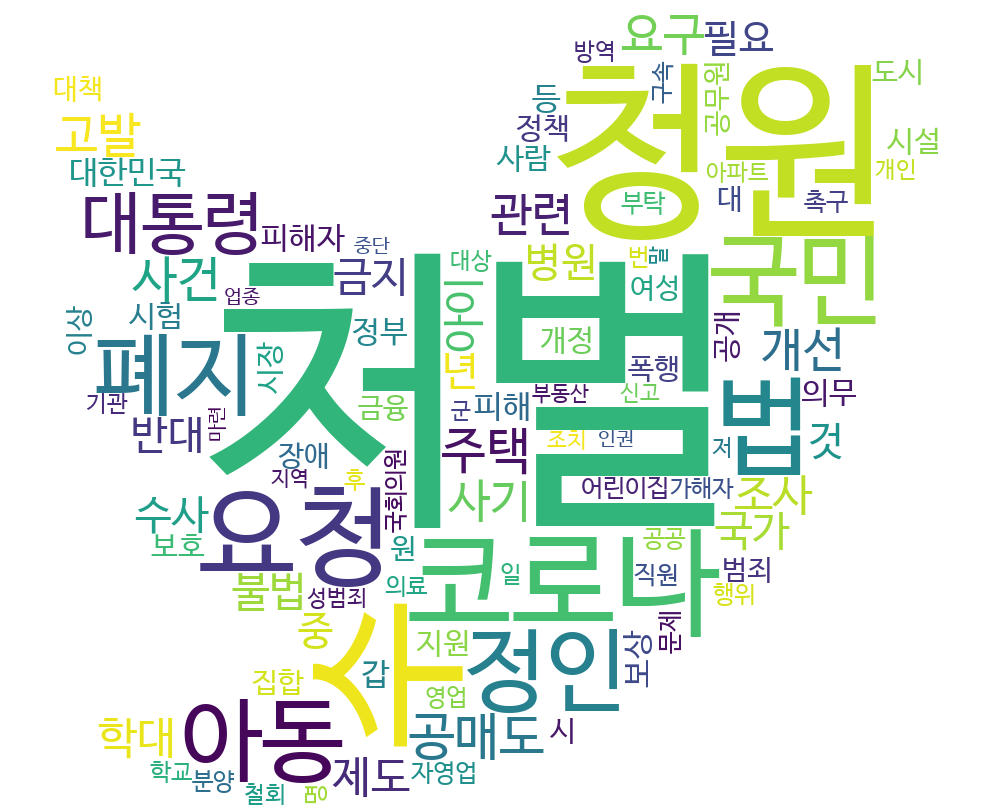

In [47]:
mask = np.array(img)

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', 
             mask = mask, # 이미지 추가
             width = mask.shape[1], height = mask.shape[0], max_words=100, max_font_size=300).generate_from_frequencies(dict(count))
wc.to_file("wc_title_with_mask.png")

img = cv2.imread('wc_title_with_mask.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)